<a href="https://colab.research.google.com/github/swayangshreesamal/volatility-risk-forecasting/blob/main/01_nifty50_data_loading_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = yf.download("^NSEI",start="2005-01-01")
df.to_csv("NSEI.csv")
df.head()

/tmp/ipython-input-2873069478.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI",start="2005-01-01")
[*********************100%***********************]  1 of 1 completed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [6]:
df.columns=df.columns.get_level_values(0)
df['log_return']=np.log(df['Close']/df['Close'].shift(1))

df[['Close','log_return']].head()


Price,Close,log_return
Date,,
2007-09-17,4494.649902,NaN
2007-09-18,4546.200195,0.011404
2007-09-19,4732.350098,0.040130
2007-09-20,4747.549805,0.003207
2007-09-21,4837.549805,0.018780


In [7]:
df['volatility_14d']=df['log_return'].rolling(window=14).std()
df=df.dropna()
df[['log_return','volatility_14d']].head()

Price,log_return,volatility_14d
Date,,
2007-10-08,-0.019619,0.014705
2007-10-09,0.046520,0.017841
2007-10-10,0.021210,0.016125
2007-10-11,0.015211,0.016056
2007-10-12,-0.017639,0.017550


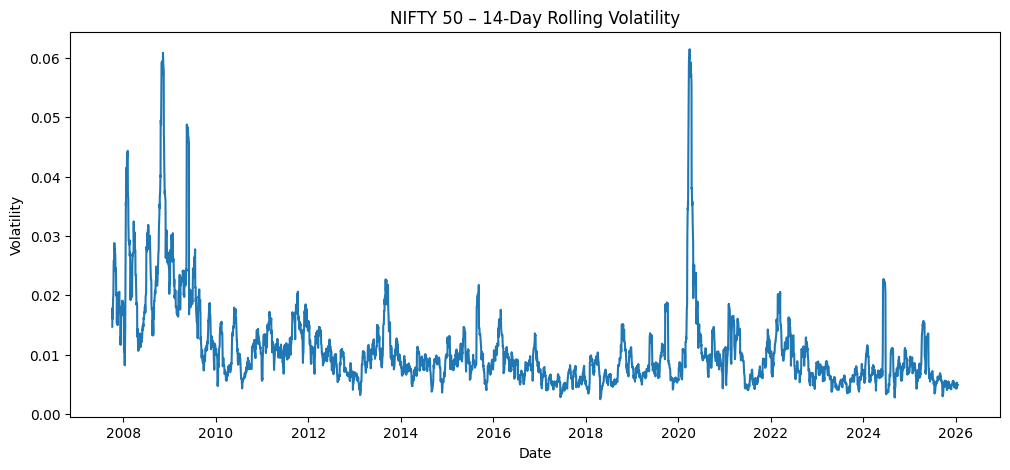

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['volatility_14d'])
plt.title("NIFTY 50 – 14-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

In [9]:
df['vol_7d']=df['log_return'].rolling(window=7).std()
df['vol_14d']=df['log_return'].rolling(window=14).std()
df['vol_30d']=df['log_return'].rolling(window=30).std()
df=df.dropna()
df[['log_return','vol_7d','vol_14d','vol_30d']].head()

Price,log_return,vol_7d,vol_14d,vol_30d
Date,,,,
2007-11-19,0.000135,0.019599,0.014979,0.022943
2007-11-20,-0.021689,0.020814,0.016008,0.023020
2007-11-21,-0.038772,0.025526,0.018750,0.022889
2007-11-22,-0.007527,0.024657,0.018767,0.022633
2007-11-23,0.016041,0.017523,0.019118,0.022652


In [10]:
df.to_csv(
    "/content/drive/My Drive/volatility-risk-forecasting/DATA/PROCESSED/nifty50_processed.csv"
)
